In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Import the datasets
calamansi_df = pd.read_csv('/content/drive/MyDrive/Datasets/citrus/calamansi_data.csv')
lime_df = pd.read_csv('/content/drive/MyDrive/Datasets/citrus/lime_data.csv')
sour_orange_df = pd.read_csv('/content/drive/MyDrive/Datasets/citrus/sour_orange_data.csv')

In [3]:
calamansi_df.shape, lime_df.shape, sour_orange_df.shape

((20, 7), (27, 7), (40, 7))

In [4]:
import pandas as pd

# Add a new column "Citrus Type" with the corresponding citrus type
calamansi_df["Citrus Type"] = 0
lime_df["Citrus Type"] = 1
sour_orange_df["Citrus Type"] = 2

# Concatenate the dataframes vertically
merged_df = pd.concat([calamansi_df, lime_df, sour_orange_df], ignore_index=True)

In [5]:
merged_df.shape

(87, 8)

In [6]:
# Shuffle the rows randomly
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

In [7]:
# Display the shuffled dataframe
shuffled_df.head()

,Length of leaves (cm),Width of leaves (cm),Area of leaves (cm²),Average Red of leaves,Average Green of leaves,Average Blue of leaves,Fruit Color (RGB),Citrus Type
0,5.1,3.3,16.83,131,156,91,"(0,255,0)",1
1,6.0,3.4,20.40,125,140,95,"(255,0,0)",2
2,4.4,3.0,13.20,123,164,95,"(0,255,0)",0
3,6.6,3.7,24.42,136,151,106,"(255,165,0)",2
4,4.3,3.0,12.90,118,163,88,"(0,255,0)",0


In [8]:
shuffled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Length of leaves (cm)    87 non-null     float64
 1   Width of leaves (cm)     87 non-null     float64
 2   Area of leaves (cm²)     87 non-null     float64
 3   Average Red of leaves    87 non-null     int64  
 4   Average Green of leaves  87 non-null     int64  
 5   Average Blue of leaves   87 non-null     int64  
 6   Fruit Color (RGB)        87 non-null     object 
 7   Citrus Type              87 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 5.6+ KB


In [9]:
import pandas as pd

def one_hot_encode_feature(df, column_name):
    # Create binary vectors for each unique value
    unique_values = {'(0,255,0)':'Green', '(255,255,0)':'Yellow', '(255,0,0)':'Red', '(255,165,0)':'Squash'}
    for key, value in unique_values.items():
        df[f'Fruit Color {value}'] = (df[column_name] == key).astype(int)

    # Drop the original column
    df.drop(columns=[column_name], inplace=True)

    return df

# One-hot encode the 'Fruit Color (RGB)' column
encoded_df = one_hot_encode_feature(shuffled_df, 'Fruit Color (RGB)')

In [10]:
# Display the shuffled dataframe
encoded_df.head()

,Length of leaves (cm),Width of leaves (cm),Area of leaves (cm²),Average Red of leaves,Average Green of leaves,Average Blue of leaves,Citrus Type,Fruit Color Green,Fruit Color Yellow,Fruit Color Red,Fruit Color Squash
0,5.1,3.3,16.83,131,156,91,1,1,0,0,0
1,6.0,3.4,20.40,125,140,95,2,0,0,1,0
2,4.4,3.0,13.20,123,164,95,0,1,0,0,0
3,6.6,3.7,24.42,136,151,106,2,0,0,0,1
4,4.3,3.0,12.90,118,163,88,0,1,0,0,0


In [11]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Length of leaves (cm)    87 non-null     float64
 1   Width of leaves (cm)     87 non-null     float64
 2   Area of leaves (cm²)     87 non-null     float64
 3   Average Red of leaves    87 non-null     int64  
 4   Average Green of leaves  87 non-null     int64  
 5   Average Blue of leaves   87 non-null     int64  
 6   Citrus Type              87 non-null     int64  
 7   Fruit Color Green        87 non-null     int64  
 8   Fruit Color Yellow       87 non-null     int64  
 9   Fruit Color Red          87 non-null     int64  
 10  Fruit Color Squash       87 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.6 KB


In [12]:
X = encoded_df.drop('Citrus Type', axis=1)
y = encoded_df['Citrus Type']

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [14]:
X.shape, y.shape

((87, 10), (87,))

In [15]:
X.head()

,Length of leaves (cm),Width of leaves (cm),Area of leaves (cm²),Average Red of leaves,Average Green of leaves,Average Blue of leaves,Fruit Color Green,Fruit Color Yellow,Fruit Color Red,Fruit Color Squash
0,0.379310,0.500000,0.373837,0.592593,0.742857,0.300000,1.0,0.0,0.0,0.0
1,0.689655,0.571429,0.581395,0.370370,0.285714,0.433333,0.0,0.0,1.0,0.0
2,0.137931,0.285714,0.162791,0.296296,0.971429,0.433333,1.0,0.0,0.0,0.0
3,0.896552,0.785714,0.815116,0.777778,0.600000,0.800000,0.0,0.0,0.0,1.0
4,0.103448,0.285714,0.145349,0.111111,0.942857,0.200000,1.0,0.0,0.0,0.0


In [16]:
X.dtypes

Length of leaves (cm)      float64
Width of leaves (cm)       float64
Area of leaves (cm²)       float64
Average Red of leaves      float64
Average Green of leaves    float64
Average Blue of leaves     float64
Fruit Color Green          float64
Fruit Color Yellow         float64
Fruit Color Red            float64
Fruit Color Squash         float64
dtype: object

In [17]:
y.dtypes

dtype('int64')

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69, 10), (18, 10), (69,), (18,))

In [20]:
import tensorflow as tf

# Create a Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train, y_train, epochs=15)

Epoch 1/15
3/3 [==============================] - 1s 7ms/step - loss: 0.9296 - accuracy: 0.4638
Epoch 2/15
3/3 [==============================] - 0s 5ms/step - loss: 0.7473 - accuracy: 0.6087
Epoch 3/15
3/3 [==============================] - 0s 5ms/step - loss: 0.5939 - accuracy: 0.8551
Epoch 4/15
3/3 [==============================] - 0s 6ms/step - loss: 0.4891 - accuracy: 0.8986
Epoch 5/15
3/3 [==============================] - 0s 4ms/step - loss: 0.4168 - accuracy: 0.9565
Epoch 6/15
3/3 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.9420
Epoch 7/15
3/3 [==============================] - 0s 7ms/step - loss: 0.2992 - accuracy: 0.9855
Epoch 8/15
3/3 [==============================] - 0s 4ms/step - loss: 0.2691 - accuracy: 0.9565
Epoch 9/15
3/3 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.9855
Epoch 10/15
3/3 [==============================] - 0s 5ms/step - loss: 0.2194 - accuracy: 0.9130
Epoch 11/15
3/3 [======================

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 4051 (15.82 KB)
Trainable params: 4051 (15.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 278ms/step - loss: 0.0496 - accuracy: 1.0000


[0.04962105304002762, 1.0]

In [23]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 93ms/step


In [24]:
y_pred[:5]

array([[1.2251574e-01, 8.6792934e-01, 9.5549095e-03],
       [1.4906437e-02, 9.8131078e-01, 3.7827054e-03],
       [5.3326556e-05, 1.9045958e-03, 9.9804205e-01],
       [1.9110244e-07, 2.9362689e-04, 9.9970627e-01],
       [5.6704548e-06, 7.9130346e-04, 9.9920303e-01]], dtype=float32)

In [25]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred[:5]

array([1, 1, 2, 2, 2])

In [27]:
y_test[:5]

76    1
0     1
26    2
22    2
12    2
Name: Citrus Type, dtype: int64

In [28]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result().numpy()

1.0

In [29]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result().numpy()

1.0

<Axes: >

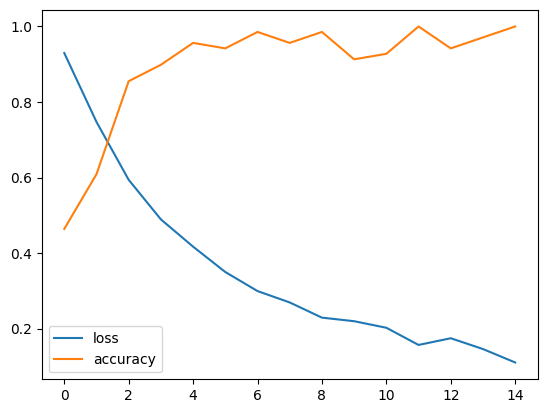

In [30]:
pd.DataFrame(model_history.history).plot()

In [118]:
import pickle

with open('/content/drive/MyDrive/Models/citrus/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [120]:
import pickle

with open('/content/drive/MyDrive/Models/citrus/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_new = loaded_model.predict(X_test)

1/1 [==============================] - 0s 66ms/step


In [121]:
y_pred_new[:5]

array([[5.9966394e-04, 2.5391453e-03, 9.9686122e-01],
       [1.5153708e-03, 3.5824096e-03, 9.9490219e-01],
       [1.2434418e-01, 8.7460232e-01, 1.0535516e-03],
       [1.0232397e-04, 1.0740010e-03, 9.9882370e-01],
       [1.5853956e-02, 9.8373950e-01, 4.0650892e-04]], dtype=float32)

In [122]:
import numpy as np

y_pred_new = np.argmax(y_pred_new, axis=1)

In [123]:
y_pred_new[:5]

array([2, 2, 1, 2, 1])

In [124]:
y_test[:5]

76    2
0     2
26    1
22    2
12    1
Name: Citrus Type, dtype: int64